In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("/mnt/github-awkward/dates.csv", parse_dates=["adate", "cdate"])
df

,which,repo,fork,path,author,adate,committer,cdate,verified,score
0,awkward,cms-lpc-llp/delayed_jet_analyzer,False,plot_scripts/MuonSystem_shower/MuonSystem_plo...,gdituri,2020-07-17 17:22:59+00:00,GitHub,2020-07-17 17:22:59+00:00,True,1.0
1,awkward,peppapiggyme/NNAlgs,False,nnalgs/algs/LMDBCreators.py,PPM,2020-06-06 07:57:01+00:00,GitHub,2020-06-06 07:57:01+00:00,True,1.0
2,awkward,phaustin/a500_notebooks,False,notebooks/awkward/tests/test_arrow.py,Phil Austin,2019-11-21 19:20:48+00:00,Phil Austin,2019-11-21 19:20:48+00:00,True,1.0
3,awkward,phaustin/a500_notebooks,False,notebooks/awkward/tests/test_numba.py,Phil Austin,2019-11-21 19:20:48+00:00,Phil Austin,2019-11-21 19:20:48+00:00,True,1.0
4,awkward,mgoncerz/SeparationPowerTool,False,SP.ipynb,mgoncerz,2020-02-15 20:43:00+00:00,mgoncerz,2020-02-15 20:43:00+00:00,False,1.0
...,...,...,...,...,...,...,...,...,...,...
723,awkward1,donalrinho/fcc_python_tools,False,fcc_python_tools/plotting.py,Donal Hill,2020-10-01 13:35:37+00:00,Donal Hill,2020-10-01 13:35:37+00:00,False,1.0
724,awkward1,CMSDAS/pps-long-exercise,False,select_events.py,Michael Pitt,2020-10-02 20:59:18+00:00,Michael Pitt,2020-10-02 20:59:18+00:00,False,1.0
725,awkward1,antoniovilela/pps-dilepton-analysis-notebook,False,select_events.py,Antonio Vilela Pereira,2020-08-06 19:15:11+00:00,Antonio Vilela Pereira,2020-08-06 19:15:11+00:00,False,1.0
726,awkward1,alexander-held/cabinetry,False,tests/test_model_utils.py,alexander-held,2020-09-29 12:33:49+00:00,GitHub,2020-09-29 12:33:49+00:00,True,1.0


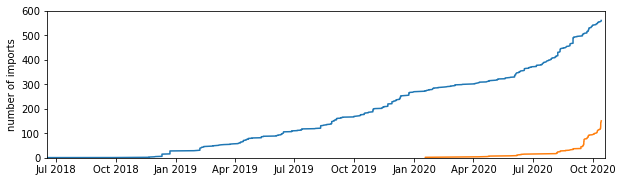

In [93]:
(fig, ax) = plt.subplots(1, 1, figsize=(10, 3))

toplot = df[["which", "cdate", "score"]].sort_values("cdate")
toplot1 = toplot[toplot["which"] == "awkward"][["cdate", "score"]]
toplot2 = toplot[toplot["which"] == "awkward1"][["cdate", "score"]]
toplot1["count"] = toplot1["score"].cumsum() - 16
toplot2["count"] = toplot2["score"].cumsum()
toplot1.plot(x="cdate", y="count", ax=ax, rot=0)
toplot2.plot(x="cdate", y="count", ax=ax, rot=0)

ax.set_xlim(17700, 18555)
ax.set_ylim(0, 600)
ax.legend().remove()
ax.set_xlabel(None)
ax.set_ylabel("number of imports")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.sca(ax)
plt.xticks(ha="center")
fig.savefig("PLOTS/github-anyone-awkward.svg")

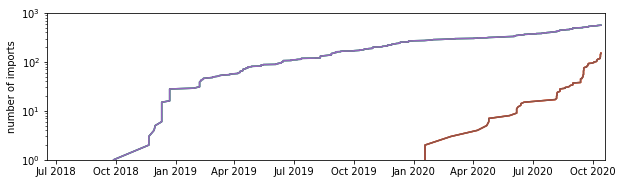

In [95]:
toplot1.plot(x="cdate", y="count", ax=ax, rot=0)
toplot2.plot(x="cdate", y="count", ax=ax, rot=0)

ax.set_yscale("log")
ax.set_xlim(17700, 18555)
ax.set_ylim(1, 1000)
ax.legend().remove()
ax.set_xlabel(None)
ax.set_ylabel("number of imports")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.sca(ax)
plt.xticks(ha="center")
fig.savefig("PLOTS/github-anyone-awkward-logy.svg")